# Packages

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import yfinance as yf
import yahoofinancials
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

*Discrete Return*
Misal $S(t)$ adalah di saham pada saat $t$ maka *return* diperoleh sebagai berikut 
\begin{equation}
\frac{S(t+\Delta t)-S(t)}{S(t)}
\end{equation}

In [2]:
stock = 'TLKM.JK'
df = yf.Ticker(stock).history(period = '1y')
df['Return'] = df['Close'].pct_change()
df['Return']

Date
2021-01-19         NaN
2021-01-20    0.017595
2021-01-21    0.002882
2021-01-22   -0.025862
2021-01-25   -0.005900
                ...   
2022-01-13    0.017032
2022-01-14    0.002392
2022-01-17   -0.002387
2022-01-18    0.016746
2022-01-19   -0.002353
Name: Return, Length: 249, dtype: float64

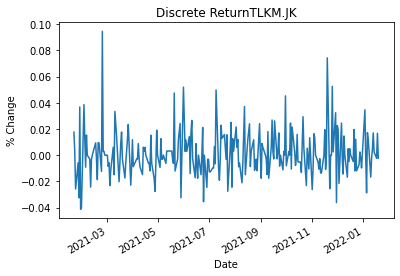

In [3]:
df['Return'].plot()
plt.ylabel('% Change')
plt.title('Discrete Return'+ stock)
plt.show()

Log Return didefinisikan sebagai berikut :
\begin{equation} 
\ln\left(\frac{S(t+\Delta t)}{S(t)}\right)
\end{equation}

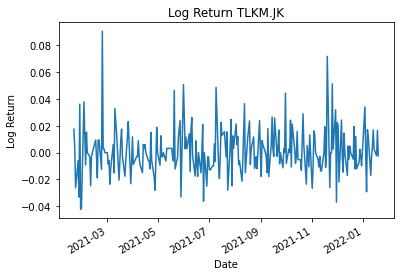

In [4]:
df['log_return'] = np.log(df['Close']) - np.log(df['Close'].shift(1))
df['log_return'].plot()
plt.ylabel('Log Return')
plt.title('Log Return ' + stock)
plt.show()

Di kalkulus dipelajari bahwa 
\begin{align*}
\ln(1+x) = x - \frac{x^2}{2} + \frac{x^3}{3} - \dots 
\end{align*}
Sehingga dapat ditinjau pula persamaan 
\begin{align*}
\ln\left(\frac{S(t+\Delta t)}{S(t)}\right)= \ln\left(\frac{S(t+\Delta t)-S(t)+S(t)}{S(t)}\right) = \ln\left(1+\frac{S(t+\Delta t)-S(t)}{S(t)}\right) \approx \frac{S(t+\Delta t)-S(t)}{S(t)}
\end{align*}
untuk suatu nilai $\frac{S(t+\Delta t) - S(t)}{S(t)}$ yang kecil